In [1]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(3)
# H gate on qubit 0, putting this qubit in a superposition of |0> + |1>.
circ.h(0)
# A CX (CNOT) gate on control qubit 0 and target qubit 1 generating a Bell state.
circ.cx(0, 1)
# CX (CNOT) gate on control qubit 0 and target qubit 2 resulting in a GHZ state.
circ.cx(0, 2)
# Draw the circuit
circ.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

# First Quantum Circuit

In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot 

In [3]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

In [4]:
for j in range(n):
    qc_output.measure(j,j)

In [5]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

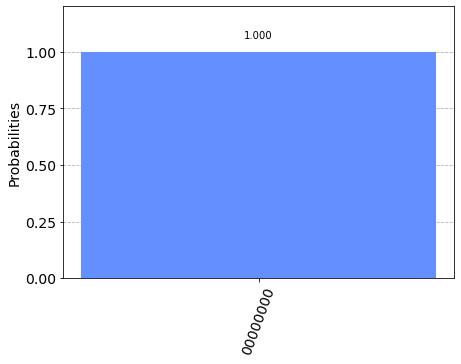

In [6]:
sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc_output)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

## Quantum adder circuit

In [7]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [23]:
qc = qc_encode + qc_output 
qc.draw()

┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
           ║ └╥┘┌─┐               
q_2: ──────╫──╫─┤M├───────────────
           ║  ║ └╥┘┌─┐            
q_3: ──────╫──╫──╫─┤M├────────────
           ║  ║  ║ └╥┘┌─┐         
q_4: ──────╫──╫──╫──╫─┤M├─────────
           ║  ║  ║  ║ └╥┘┌─┐      
q_5: ──────╫──╫──╫──╫──╫─┤M├──────
           ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ──────╫──╫──╫──╫──╫──╫─┤M├───
     ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6  7

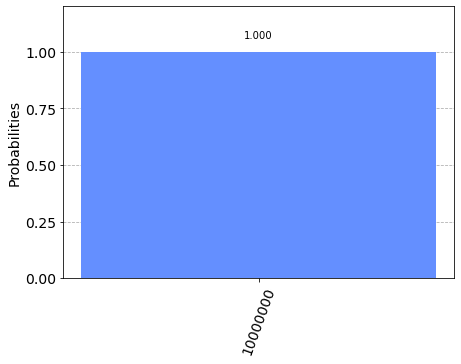

In [26]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [27]:
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────

In [28]:
qc = qc_encode + qc_output 
qc.draw()

┌─┐                  
q_0: ─────┤M├──────────────────
     ┌───┐└╥┘            ┌─┐   
q_1: ┤ X ├─╫─────────────┤M├───
     └───┘ ║ ┌─┐         └╥┘   
q_2: ──────╫─┤M├──────────╫────
           ║ └╥┘┌─┐       ║    
q_3: ──────╫──╫─┤M├───────╫────
           ║  ║ └╥┘┌─┐    ║    
q_4: ──────╫──╫──╫─┤M├────╫────
     ┌───┐ ║  ║  ║ └╥┘    ║ ┌─┐
q_5: ┤ X ├─╫──╫──╫──╫─────╫─┤M├
     └┬─┬┘ ║  ║  ║  ║     ║ └╥┘
q_6: ─┤M├──╫──╫──╫──╫─────╫──╫─
      └╥┘  ║  ║  ║  ║ ┌─┐ ║  ║ 
q_7: ──╫───╫──╫──╫──╫─┤M├─╫──╫─
       ║   ║  ║  ║  ║ └╥┘ ║  ║ 
c: 8/══╩═══╩══╩══╩══╩══╩══╩══╩═
       6   0  2  3  4  7  1  5

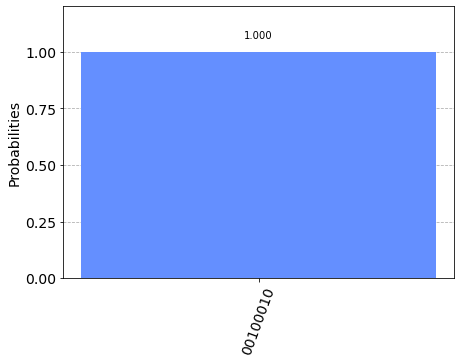

In [29]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [30]:
qc_encode = QuantumCircuit(n)
qc_encode.x(2)
qc_encode.x(3)
qc_encode.x(4)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     ├───┤
q_4: ┤ X ├
     └───┘
q_5: ─────
          
q_6: ─────
          
q_7: ─────

# Quantum Circuit. Output. Binary number 28 = 00011100 
# Experimental : Inicializa foton en estado |V> = 0 y compuerta logica (Polarizadores a 45º) en los qubits 2,3,4. De igual manera se puede inicializar  un foton diagonalizado |Y> = 1/2 ( |V> + |H> ) y usar las bases ortogonales diagonal y antigiagonal para obtener los bits respectivos que representan el numero 28. 


In [33]:
qc = qc_encode + qc_output 
qc.draw()

┌─┐                  
q_0: ─────┤M├──────────────────
          └╥┘┌─┐               
q_1: ──────╫─┤M├───────────────
     ┌───┐ ║ └╥┘      ┌─┐      
q_2: ┤ X ├─╫──╫───────┤M├──────
     ├───┤ ║  ║       └╥┘┌─┐   
q_3: ┤ X ├─╫──╫────────╫─┤M├───
     ├───┤ ║  ║        ║ └╥┘┌─┐
q_4: ┤ X ├─╫──╫────────╫──╫─┤M├
     └┬─┬┘ ║  ║        ║  ║ └╥┘
q_5: ─┤M├──╫──╫────────╫──╫──╫─
      └╥┘  ║  ║ ┌─┐    ║  ║  ║ 
q_6: ──╫───╫──╫─┤M├────╫──╫──╫─
       ║   ║  ║ └╥┘┌─┐ ║  ║  ║ 
q_7: ──╫───╫──╫──╫─┤M├─╫──╫──╫─
       ║   ║  ║  ║ └╥┘ ║  ║  ║ 
c: 8/══╩═══╩══╩══╩══╩══╩══╩══╩═
       5   0  1  6  7  2  3  4

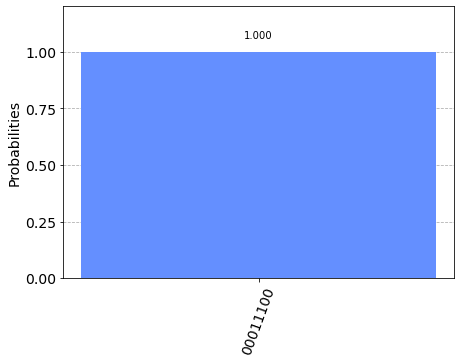

In [34]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)